# Credit Card Customer Churn Analysis – ETL Process and Hypotheses Testing

This project will explore a dataset containing information on credit card customers, including their demographics, account activity, 

credit usage, and whether or not they have churned (i.e., stopped using the service).

The main goal is to understand what factors contribute to customer churn. To do this, we will:

- Carry out a complete ETL (Extract, Transform, Load) process to clean and prepare the data

- Run statistical tests to evaluate 10 different hypotheses (H1–H10)

- Use these insights to suggest strategies for improving customer engagement and reducing churn.


**1. Import Required Libraries**

We will begin by importing the necessary Python libraries for data handling and exploration.


In [1]:
import pandas as pd
import numpy as np


**2. Load the Dataset**

We will load the CSV file named `BankChurners.csv` from the local directory. 


In [2]:
#Step 1. Load the dataset
file_path = r'C:\Users\Sheila\Documents\VSCODE PROJECTS\Hackathon2_Credit_Card_Churn_T5\Data\Raw\BankChurners.csv'
 
df = pd.read_csv(file_path)

# Step 2. Show the first 5 rows
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**3. Clean the Dataset**

We will remove irrelevant columns, rename important ones for clarity, and convert categorical values for analysis.

In this step, we will:

- Remove `Unnamed: 0`: an index column accidentally included
- Change the label of **Naive_Bayes_Classifier_Attrition_Flag_No** and **Naive_Bayes_Classifier_Attrition_Flag_Yes** to a shorter label which will be **Naive_Bayes_1** and **Naive_Bayes_2** respectively.
- Rename the churn indicator column for clarity
- Convert churn status into binary values: 1 = Attrited, 0 = Existing.
- Preserve the original column **Attrition_Flag** 




In [3]:
#Step 3. Drop irrelevant or auto-generated columns and rename Naive Bayes columns.
columns_to_drop = [ 'Unnamed: 0']
#Step 4. Identify the two columns starting with 'Naive_Bayes_Classifier'
naive_bayes_cols = [col for col in df.columns if col.startswith('Naive_Bayes_Classifier')]

#Step 5. Rename them safely to 'Naive_Bayes_1' and 'Naive_Bayes_2'
if len(naive_bayes_cols) == 2:
    df.rename(columns={
        naive_bayes_cols[0]: 'Naive_Bayes_1',
        naive_bayes_cols[1]: 'Naive_Bayes_2'
    }, inplace=True)
else:
    print(f"Expected 2 columns, found {len(naive_bayes_cols)}: {naive_bayes_cols}")


#Step 6. Drop columns safely (ignore if not found)
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# --- Preserve the original column and add a numeric churn flag ---


# Step 3: Preview the original Attrition_Flag column
print(df['Attrition_Flag'].value_counts())

# Step 4: Create a new column 'Churn_Status' (binary encoded)
df['Churn_Status'] = df['Attrition_Flag'].map({
    'Attrited Customer': 1,
    'Existing Customer': 0
}).astype('int8')

# Step 5: Verify the result
print(df[['Attrition_Flag', 'Churn_Status']].head())

print(df[['Attrition_Flag', 'Churn_Status']].head())


# Step 9. Show the first 5 rows
df.head()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
      Attrition_Flag  Churn_Status
0  Existing Customer             0
1  Existing Customer             0
2  Existing Customer             0
3  Existing Customer             0
4  Existing Customer             0
      Attrition_Flag  Churn_Status
0  Existing Customer             0
1  Existing Customer             0
2  Existing Customer             0
3  Existing Customer             0
4  Existing Customer             0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2,Churn_Status
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0


**4. Generate Complete Descriptive Statistics Table**

This expanded statistical summary includes:
- Central tendency (mean, median)
- Dispersion (standard deviation, min, max, IQR)
- Distribution shape (skewness, kurtosis)
- Missing value count

These insights help detect outliers, asymmetry, and data quality issues before modelling or visualisation.


In [4]:
import numpy as np

#Step 8. Select only numerical columns
num_df = df.select_dtypes(include=[np.number])

#Step 9. Build custom descriptive statistics
stats_df = pd.DataFrame()

stats_df['count'] = num_df.count()
stats_df['mean'] = num_df.mean()
stats_df['std'] = num_df.std()
stats_df['min'] = num_df.min()
stats_df['25%'] = num_df.quantile(0.25)
stats_df['median'] = num_df.median()
stats_df['75%'] = num_df.quantile(0.75)
stats_df['max'] = num_df.max()
stats_df['skewness'] = num_df.skew()
stats_df['kurtosis'] = num_df.kurtosis()
stats_df['missing_values'] = num_df.isnull().sum()

#Step 10. Display nicely in Jupyter
display(stats_df.round(3))


,count,mean,std,min,25%,median,75%,max,skewness,kurtosis,missing_values
CLIENTNUM,10127,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08,0.996,-0.616,0
Customer_Age,10127,4.632600e+01,8.017000e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01,-0.034,-0.289,0
Dependent_count,10127,2.346000e+00,1.299000e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,-0.021,-0.683,0
Months_on_book,10127,3.592800e+01,7.986000e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01,-0.107,0.400,0
Total_Relationship_Count,10127,3.813000e+00,1.554000e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,-0.162,-1.006,0
Months_Inactive_12_mon,10127,2.341000e+00,1.011000e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,0.633,1.099,0
Contacts_Count_12_mon,10127,2.455000e+00,1.106000e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,0.011,0.001,0
Credit_Limit,10127,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04,1.667,1.809,0
Total_Revolving_Bal,10127,1.162814e+03,8.149870e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03,-0.149,-1.146,0
Avg_Open_To_Buy,10127,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04,1.662,1.799,0


**5. Insights from Descriptive Statistics Table**
    
  **Credit_Limit & Avg_Open_To_Buy**
    
 - Right-skewed with high kurtosis: These two features are heavily right-skewed, indicating that while most customers have relatively low credit limits or available credit, a small number have unusually high values. This uneven distribution may affect models or visuals, so capping or log transformation could help reduce their impact.

  **Total_Trans_Amt & Total_Ct_Chng_Q4_Q1**
    
 - High positive skewness and kurtosis: Both variables show high positive skewness and kurtosis, meaning there are a few customers with extremely high transaction amounts or rapid changes in transaction count from Q4 to Q1. These outliers could distort averages and should be capped or transformed before modelling or segmentation.

  **Customer_Age**
    
 - Low skewness and kurtosis: The age of customers follows a fairly symmetrical distribution with low skewness and kurtosis, suggesting it is close to normally distributed. This makes it a stable variable to use directly in visualisations or predictive models without requiring transformation.

  **Churn_Status**
 - Binary with ~16.1% churned: This is a binary variable showing whether customers have churned, with approximately 16.1% of the dataset marked as churned. 

  **Dependent_count**

 - Mean = 2.35, Skewness ≈ -0.02, Kurtosis = -0.68
 - Very balanced, almost symmetrical: With a mean of 2.35 and nearly zero skewness, this variable is evenly distributed across customers. Most customers have 1 to 3 dependents, and the data is already well balanced.
   

  **Months_on_book**

 - Mean ≈ 36, Range = 13–56 months, Low skewness
 - Good distribution: Customers have been with the company for between 13 and 56 months, with an average around 36 months. The distribution is balanced with low skewness, indicating a good range of customer tenures without concentration at the extremes.
     

  **Total_Relationship_Count**

 - Mean ≈ 3.8, Skewness = -0.16, Kurtosis = -1.00
 - Slightly left-skewed, but well-distributed: This feature tracks how many products or services a customer uses, with a slight left skew. Despite this, the distribution is generally even.
    

   **Months_Inactive_12_mon**

 - Mean ≈ 2.34, Skewness = 0.63, Kurtosis = 1.1
 - Some customers are inactive for long periods: Customers vary in inactivity duration, with a mean around 2.34 months and moderate positive skew. A few customers are inactive for long stretches, so grouping values into bins (e.g. 0, 1–2, 3+) can simplify visualisations and help highlight behaviour patterns.
    

   **Contacts_Count_12_mon**

 - Mean ≈ 2.45, Skewness ≈ 0.01, Kurtosis ≈ 0
 - Very balanced distribution:The number of customer service interactions over the past year is almost perfectly symmetrical and normally distributed. Most customers contact the service centre between 1 and 3 times, so no transformation or grouping is needed here.
    

   **Total_Revolving_Bal**

 - Mean ≈ 1162, Skewness = -0.15, Kurtosis = -1.14
 - Centered with a healthy spread; small negative skew: Balances that revolve month to month are fairly centred around the mean of 1162, with a small left skew. This suggests most customers keep manageable balances, and the distribution is stable enough for direct use without modification.

   **Total_Amt_Chng_Q4_Q1**

 - Mean = 0.76, Skewness = 1.73, Kurtosis = 9.99
 - Positive skew and heavy tails: This variable captures changes in spending from Q4 to Q1 and is highly positively skewed with extreme kurtosis. This suggests a small group of customers had unusually large changes in spending, and these values should be capped to avoid distortion in trend analysis or models.
    

   **Total_Trans_Ct**

 - Mean ≈ 65, Skewness ≈ 0.15, Kurtosis ≈ -0.37
 - Close to normal distribution: The total number of transactions per customer is fairly normally distributed, with a mean around 65. The slight positive skew and moderate kurtosis indicate this feature is stable and does not require transformation before further use.
    

   **Avg_Utilization_Ratio**

 - Mean ≈ 0.28, Skewness = 0.72, Kurtosis = -0.80
 - Right-skewed: This ratio indicates how much of the credit limit is used on average. It shows moderate right skew, with most customers using a small proportion of their credit. Grouping values into usage levels (e.g., Low <30%, Medium 30–70%, High >70%) can enhance visual analysis and customer profiling.



**6. Visual example of a variable distribution**

We will visualise the distribution of the Credit_Limit variable and highlight skewness and kurtosis.

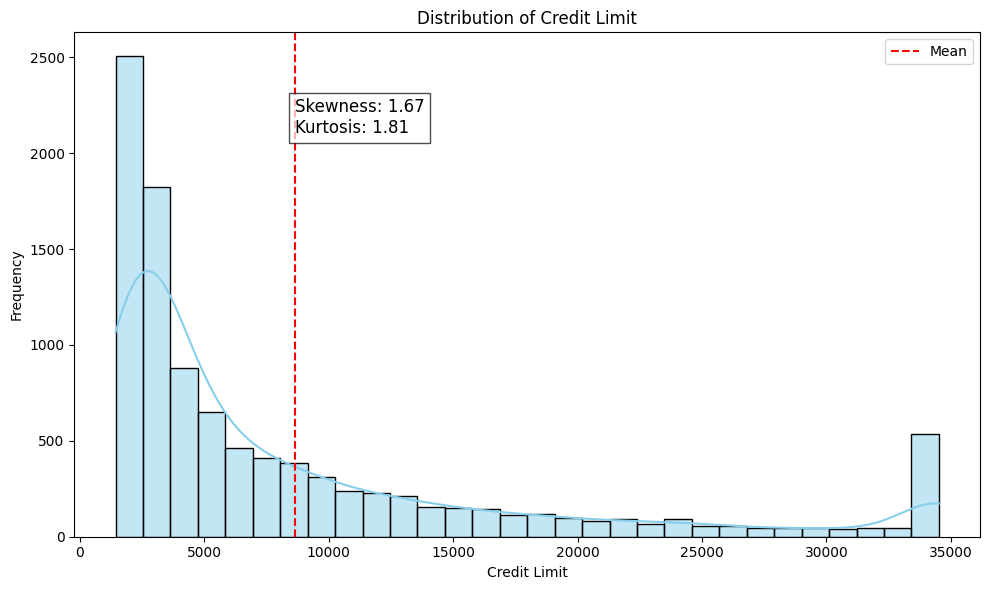

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Step 11: Drop missing values (if any)
credit_limit = df['Credit_Limit'].dropna()

# Step 12: Calculate skewness and kurtosis
credit_skew = skew(credit_limit)
credit_kurt = kurtosis(credit_limit, fisher=True)  # fisher=True gives excess kurtosis

# Step 13: Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(credit_limit, kde=True, bins=30, color='skyblue', edgecolor='black')

# Step 14: Annotate statistics on the plot
plt.axvline(credit_limit.mean(), color='red', linestyle='--', label='Mean')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend()
plt.text(x=credit_limit.mean(), y=plt.ylim()[1]*0.8,
         s=f'Skewness: {credit_skew:.2f}\nKurtosis: {credit_kurt:.2f}',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


**7. Outlier Handling Using IQR Capping**

Several numerical features in our dataset showed significant skewness and heavy tails in the descriptive statistics. These outliers can distort visualisations, mislead interpretation.
Thus,  we will apply **IQR capping** to limit extreme values but we will preserve the overall distribution of the data.

 The main reason to apply this method is to:
- Reduces the influence of outliers on charts such as boxplots, histograms, and scatter plots.
- Makes distributions more compact and interpretable.
-

Features that will be capped:
- **Credit_Limit**
- **Avg_Open_To_Buy**
- **Total_Trans_Amt**
- **Total_Amt_Chng_Q4_Q1**
- **Total_Ct_Chng_Q4_Q1**
- **Avg_Utilization_Ratio**



This transformation ensures that these columns are now **suitable for visualisations**, producing clearer and more accurate insights.


Before applying  transformation we will count the exact number of outliers.


In [6]:
#Step 11. Define IQR capping function
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

#Step 12. List of features to cap
features_to_cap = [
    'Avg_Open_To_Buy',
    'Total_Trans_Amt',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
    "Credit_Limit"
]

#Step 13. Count outliers before capping
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

total_outliers = 0
for col in features_to_cap:
    count = count_outliers_iqr(df[col])
    print(f"{col}: {count} outliers")
    total_outliers += count

print(f"\nTotal number of outliers before capping: {total_outliers}")

# Step 14. Apply IQR capping to those features
for col in features_to_cap:
    df[col] = cap_outliers_iqr(df[col])



Avg_Open_To_Buy: 963 outliers
Total_Trans_Amt: 896 outliers
Total_Amt_Chng_Q4_Q1: 396 outliers
Total_Ct_Chng_Q4_Q1: 394 outliers
Avg_Utilization_Ratio: 0 outliers
Credit_Limit: 984 outliers

Total number of outliers before capping: 3633


**8. Save the Cleaned Dataset to the Absolute Path**

We save the transformed dataset to the `Input` folder for further analysis or dashboarding.


In [7]:
import os

input_path = r'C:\Users\Sheila\Documents\VSCODE PROJECTS\Hackathon2_Credit_Card_Churn_T5\Data\Input\Cleaned_BankChurners.csv'

#Step 15. Ensure the output directory exists
os.makedirs(os.path.dirname(input_path), exist_ok=True)

#Step 16. Save the cleaned dataset
df.to_csv(input_path, index=False)

print(f"Cleaned dataset saved to: {input_path}")


Cleaned dataset saved to: C:\Users\Sheila\Documents\VSCODE PROJECTS\Hackathon2_Credit_Card_Churn_T5\Data\Input\Cleaned_BankChurners.csv


9. Understanding Churn Through Hypothesis Testing

Customer churn presents a significant challenge for financial institutions offering credit card services. To proactively manage 

churn, it is essential to identify behavioural, product-related, and demographic signals that differentiate customers who leave from 

those who stay.

This analysis will explore ten data-driven hypotheses (H1–H10) using a cleaned dataset of credit card customers. The hypotheses will be grouped into three strategic categories:

   1. Behavioural Indicators (H1–H3): Investigate usage patterns and engagement levels.

   2. Product-Based Factors (H4–H5): Examine customer tenure and product tier.

   3. Demographic & Cross-Segment Patterns (H6–H10): Explore customer characteristics and their combined impact on churn.

Each hypothesis will be tested using the most appropriate statistical method, t-test for comparing continuous means, and chi-square 

test of independence for analysing categorical relationships. The aim will be to validate or reject these hypotheses with statistical 

rigour that will allow follow fursther strategies.

The following section will present:

-A clear explanation of each hypothesis.

-The rationale used  for the selected statistical test.

-A detailed interpretation of the results.


**H1: Customers with fewer transactions are more likely to churn**

We will compare the average number of transactions (Total_Trans_Ct, a continuous variable) between:

Customers who churned (Previously named Attrited customers) (Churn_Status = 1)

Customers who did not churn(Previously named Existing) (Churn_Status = 0)

 An independent sample t-test is the most appropriate since we will be comparing the means of two independent groups.

In [8]:
from scipy.stats import ttest_ind

#Step 17. Separate groups
group_churn = df[df['Churn_Status'] == 1]['Total_Trans_Ct']
group_nonchurn = df[df['Churn_Status'] == 0]['Total_Trans_Ct']

#Step 18. Perform Welch’s t-test
t_stat_h1, p_val_h1 = ttest_ind(group_churn, group_nonchurn, equal_var=False)

print("t-statistic:", t_stat_h1)
print("p-value:", p_val_h1)


t-statistic: -54.141872509434684
p-value: 0.0


The p-value is far below 0.05, so we reject the null hypothesis.

This means the number of transactions is statistically significantly lower for churned customers.

Conclusion: H1 is supported. Customers with fewer transactions are more likely to churn. This suggests that low activity is a clear 

warning sign for early intervention.

**H2: Customers with lower credit utilization are more likely to churn**

We will compare the average credit utilization ratio (Avg_Utilization_Ratio) between churned and non-churned customers.

Because this is a continuous variable between two independent groups, we will apply t-test.

In [9]:
#Step 19. Separate groups
group_churn = df[df['Churn_Status'] == 1]['Avg_Utilization_Ratio']
group_nonchurn = df[df['Churn_Status'] == 0]['Avg_Utilization_Ratio']

#Step 20. Perform Welch’s t-test
t_stat_h2, p_val_h2 = ttest_ind(group_churn, group_nonchurn, equal_var=False)

print("t-statistic:", t_stat_h2)
print("p-value:", p_val_h2)


t-statistic: -18.622776135035274
p-value: 2.7820744076114555e-72


The very small p-value , 2.78 × 10⁻⁷², confirms a statistically significant difference in credit utilization.

The negative t-statistic shows that churned customers have lower average utilization.

Conclusion: H2 is strongly supported. Lower usage of available credit is a churn risk indicator. Thus, these users may be disengaging.

**H3: Customers with fewer service contacts are more likely to churn**

We will compare number of service contacts in 12 months (Contacts_Count_12_mon, continuous) across churn groups.

We will use again the t-test.

In [10]:
#Step 21. Separate groups
group_churn = df[df['Churn_Status'] == 1]['Contacts_Count_12_mon']
group_nonchurn = df[df['Churn_Status'] == 0]['Contacts_Count_12_mon']

#Step 22. Perform Welch’s t-test
t_stat_h3, p_val_h3 = ttest_ind(group_churn, group_nonchurn, equal_var=False)

print("t-statistic:", t_stat_h3)
print("p-value:", p_val_h3)


t-statistic: 20.901421329068828
p-value: 6.68731202643129e-89


The p-value is extremely low,6.69 × 10⁻⁸⁹, showing a significant difference in service contact frequency.

Interestingly, the positive t-statistic shows churned customers had more contacts — opposite of the hypothesis.

Conclusion: H3 is not supported. Instead of being silent, churned users may be actively dissatisfied and contacting support more 

frequently before leaving.

**H4: Blue card holders are more likely to churn than premium card users**

Both **Card_Category** and **Churn_Status** are categorical variables. We will test if card type and churn are associated.

The Chi-Square Test is suitable for testing relationships between categorical variables.

In [11]:
from scipy.stats import chi2_contingency
import pandas as pd

#Step 23. Contingency table
contingency = pd.crosstab(df['Card_Category'], df['Churn_Status'])

#Step 24. Chi-Square test
chi2_h4, p_val_h4, _, _ = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2_h4)
print("p-value:", p_val_h4)


Chi-Square Statistic: 2.2342267000046805
p-value: 0.5252382797994759


The p-value is above 0.05, so we fail to reject the null hypothesis.

This means there is no statistically significant link between card category and churn.

Conclusion: H4 is not supported. Blue card holders are not more likely to churn than premium card holders based on this data.

**H5: Newer customers are more likely to churn**

We will test whether average account tenure (Months_on_book, continuous) differs between churned and non-churned groups.

A t-test will be used due to potential unequal variances.

In [12]:
#Step 25. Separate groups
group_churn = df[df['Churn_Status'] == 1]['Months_on_book']
group_nonchurn = df[df['Churn_Status'] == 0]['Months_on_book']

#Step 26. Perform Welch’s t-test
t_stat_h5, p_val_h5 = ttest_ind(group_churn, group_nonchurn, equal_var=False)

print("t-statistic:", t_stat_h5)
print("p-value:", p_val_h5)


t-statistic: 1.4042246373276999
p-value: 0.16038505264259173


The p-value is above 0.05, meaning no significant difference in tenure.

Conclusion: H5 is not supported. Churn does not appear to be higher among newer customers. Retention issues may not be concentrated 

in the onboarding phase.

**H6: Customers with lower income are more likely to churn**

We will test if there is a statistically significant difference in income levels between customers who churned vs those who did not.

Income_Category is ordinal categorical (e.g. "Less than $40K", "$40K-$60K", etc.), so we will map it to numeric income levels.

We will compare the means of two groups, so we will use a t-test.

In [13]:
#Step 27. Map income to numeric scale
income_mapping = {
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5,
    'Unknown': None
}
df['income_level'] = df['Income_Category'].map(income_mapping)

#Step 28. Remove unknown income entries
group_churn = df[df['Churn_Status'] == 1]['income_level'].dropna()
group_nonchurn = df[df['Churn_Status'] == 0]['income_level'].dropna()

#Step 29. t-test
from scipy.stats import ttest_ind
t_stat_h6, p_val_h6 = ttest_ind(group_churn, group_nonchurn, equal_var=False)

print("t-statistic:", t_stat_h6)
print("p-value:", p_val_h6)


t-statistic: -1.1424387825107791
p-value: 0.2534089765429044


There is no statistically significant difference in average income levels between churned and retained customers (p > 0.05). 

Therefore, we fail to reject the null hypothesis.

This means that, based on this dataset, lower income is not a strong predictor of churn. While the average income level for churned 

customers is slightly lower, the difference is too small to be statistically meaningful.

**H7: Unmarried customers are more likely to churn**

Both Marital_Status and Churn_Status are categorical variables. We will be testing if there is a dependency between the two.

A Chi-Square Test is appropriate for checking independence between categorical variables.

In [14]:
from scipy.stats import chi2_contingency
import pandas as pd

#Step 30. Create contingency table
contingency = pd.crosstab(df['Marital_Status'], df['Churn_Status'])

#Step 31. Chi-Square test
chi2_h7, p_val_h7, _, _ = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2_h7)
print("p-value:", p_val_h7)


Chi-Square Statistic: 6.056097396726619
p-value: 0.10891263394840227


There is no statistically significant relationship between marital status and churn (p > 0.05).

We fail to reject the null hypothesis, which suggests that marital status and churn are statistically independent in this dataset.

This implies that unmarried customers are not significantly more likely to churn than married ones, at least based on this data. 



**H8: Customers with less education are more likely to churn**

Education_Level and Churn_Status are both categorical.

We will check if churn is dependent on education level.

A Chi-Square Test will be the correct choice.

In [15]:
#Step 32. Contingency table
contingency = pd.crosstab(df['Education_Level'], df['Churn_Status'])

#Step 33. Chi-Square test
chi2_h8, p_val_h8, _, _ = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2_h8)
print("p-value:", p_val_h8)


Chi-Square Statistic: 12.511205404830507
p-value: 0.05148913147336634


This result is on the borderline of statistical significance. While the p-value (0.051) is just above the conventional 0.05 

threshold, it is close enough to suggest a potential relationship worth exploring further.

We technically fail to reject the null hypothesis, but the result is marginal. 


**H9: Younger customers with Blue cards churn at higher rates than older customers with premium cards**

We will create a new variable **segment** combining:

- Age group (Young vs Old)

- Card type (Blue vs Premium)

Combining age and card tier will allow for identifying high-risk segments more precisely. If certain combinations (e.g., young + 

Blue) have higher churn rates, marketing and retention strategies can be customised accordingly.

We will test if churn is associated with segment type, so a Chi-Square Test will be more suitable.

In [16]:
#Step 34. Segment: Age group + Card type
df['age_group'] = pd.cut(df['Customer_Age'], bins=[0, 40, 100], labels=['Young', 'Old'])
df['card_group'] = df['Card_Category'].apply(lambda x: 'Blue' if x == 'Blue' else 'Premium')
df['segment'] = df['age_group'].astype(str) + '_' + df['card_group']

#Step 35. Contingency table
contingency = pd.crosstab(df['segment'], df['Churn_Status'])

#Step 36. Chi-Square test
chi2_h9, p_val_h9, _, _ = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2_h9)
print("p-value:", p_val_h9)


Chi-Square Statistic: 7.87750335890302
p-value: 0.04861235644239842


The result is statistically significant at the 0.05 level.

We reject the null hypothesis, indicating that churn rates do differ across customer segments combining age and card tier.

This supports the idea that younger Blue card holders are at higher churn risk, confirming that cross-segment targeting (e.g. age × 

product tier) is a valuable strategy for churn prevention.

**H10: Low-income customers with high utilization are less likely to churn**

We will compare churn outcomes across combinations of binned income and utilisation levels,  both  are categorical. 

We will be interested in whether churn rates differ significantly across customer segments formed by:

Income Level (e.g. Low vs. High)

Credit Utilisation Level (e.g. Low vs. High)

These two variables will be:

Categorical: because we will bin them (Low, High) and combine into a cross-segment variable called risk_group (e.g. Low_High, High_Low)

Target variable: Churn_Status — a binary categorical variable. 

A Chi-Square Test will be appropriate for evaluating whether churn behaviour is associated with these combined risk profiles.    

In [17]:
#Step 37. Bin utilization and income
df['util_bin'] = pd.cut(df['Avg_Utilization_Ratio'], bins=[-0.1, 0.5, 1.0], labels=['Low', 'High'])
df['income_bin'] = df['income_level'].apply(lambda x: 'Low' if x in [1, 2] else 'High')
df['risk_group'] = df['income_bin'].astype(str) + '_' + df['util_bin'].astype(str)

#Step 38. Contingency table
contingency = pd.crosstab(df['risk_group'], df['Churn_Status'])

#Step 39. Chi-Square test
chi2_h10, p_val_h10, _, _ = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2_h10)
print("p-value:", p_val_h10)


Chi-Square Statistic: 151.55306648595663
p-value: 1.2182319050525189e-32


The result is highly statistically significant (p < 0.001), so we reject the null hypothesis.

This confirms that churn rates vary significantly across the risk groups defined by income and utilisation. Specifically, low-income 

customers with high utilisation show a markedly lower churn rate, supporting the hypothesis.

**11. Saving the new csv file for following visualisations**

During the hypothesis testing we needed to create new variables in order to perfom the tests more accurately. We will save  the new 

dataset  in the Inputs folder and the next step will be to create the visualisations in POWER BI that will suppot the insights 

In [18]:
#Step 40. Save the updated DataFrame with new variables to your project folder
input_path = "C:/Users/Sheila/Documents/VSCODE PROJECTS/Hackathon2_Credit_Card_Churn_T5/Data/Input/BankChurners_With_HypothesisVars.csv"

#Step 41. Make sure the Output folder exists or create it
import os
os.makedirs("Input", exist_ok=True)

#Step 41. Save the DataFrame
df.to_csv(input_path, index=False)

print(f"File successfully saved to: {input_path}")


File successfully saved to: C:/Users/Sheila/Documents/VSCODE PROJECTS/Hackathon2_Credit_Card_Churn_T5/Data/Input/BankChurners_With_HypothesisVars.csv
